In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(project_root)

from src.w_b import *
from ultralytics import YOLO
import os
import json

In [2]:
def train(
        yaml_path: str = "dataset/custom.yaml",
        model_name: str = "yolov10x_best.pt",
        test_path: (str | None) = "dataset/images/test",
        epochs: int = 200,
        batch: int = 16,
        imgsz: int = 960,
        device: (int | str) = 0,
        plots: bool = True,
        save_path: (str | None) = None,
        model_name_wb: str = "YOLOv10",
        dataset_name_wb: str = "random_split",
        lr0: float = 0.01,
        lrf: float = 0.01,
        weight_decay: float = 0.0005,
        warmup_epochs: float = 3.0,
        cos_lr: bool = False,
        
):
    overrides = {
        "epochs": epochs,
        "imgsz": imgsz,
        "batch": batch,
        "lr0": lr0,
        "lrf": lrf,
        "weight_decay": weight_decay,
        "warmup_epochs": warmup_epochs,
        "cos_lr": cos_lr
    }
    
    init_wandb(model_name_wb, dataset_name_wb, overrides)

    if save_path:
        os.makedirs(save_path, exist_ok=True)

    # if 'yolov10' in model_name:
    #     model = YOLOv10(model_name)
    # else:
    #     model = YOLO(model_name)

    model = YOLO(model_name)

    train_results = model.train(
        data=yaml_path,  # path to dataset YAML
        epochs=epochs,  # number of training epochs
        imgsz=imgsz,  # training image size
        batch=batch,  # batch size
        device=device,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
        plots=plots,  # create plots
        lr0=lr0,  # initial learning rate (SGD=5E-3, Adam=5E-4)
        lrf=lrf,  # final learning rate (with cos scheduler)
        weight_decay=weight_decay,  # weight decay
        warmup_epochs=warmup_epochs,  # number of warmup epochs
        cos_lr=cos_lr,  # cosine learning rate scheduler
    )

    metrics = model.val()

    if test_path:
        images = os.listdir(test_path)
        images = [os.path.join(test_path, file) for file in images if '.DS_Store' not in file]
        results = model(
            images,
            save_txt=True,
            conf=0.5
        )

        return train_results, metrics, results

    return train_results, metrics

In [3]:
train_results, metrics, results = train(epochs=200, device=0, batch=24)

wandb: Currently logged in as: alexandraroze2000 (alexandraroze) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


New https://pypi.org/project/ultralytics/8.3.74 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.6.0+cpu 


ValueError: Invalid CUDA 'device=0' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: None
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.


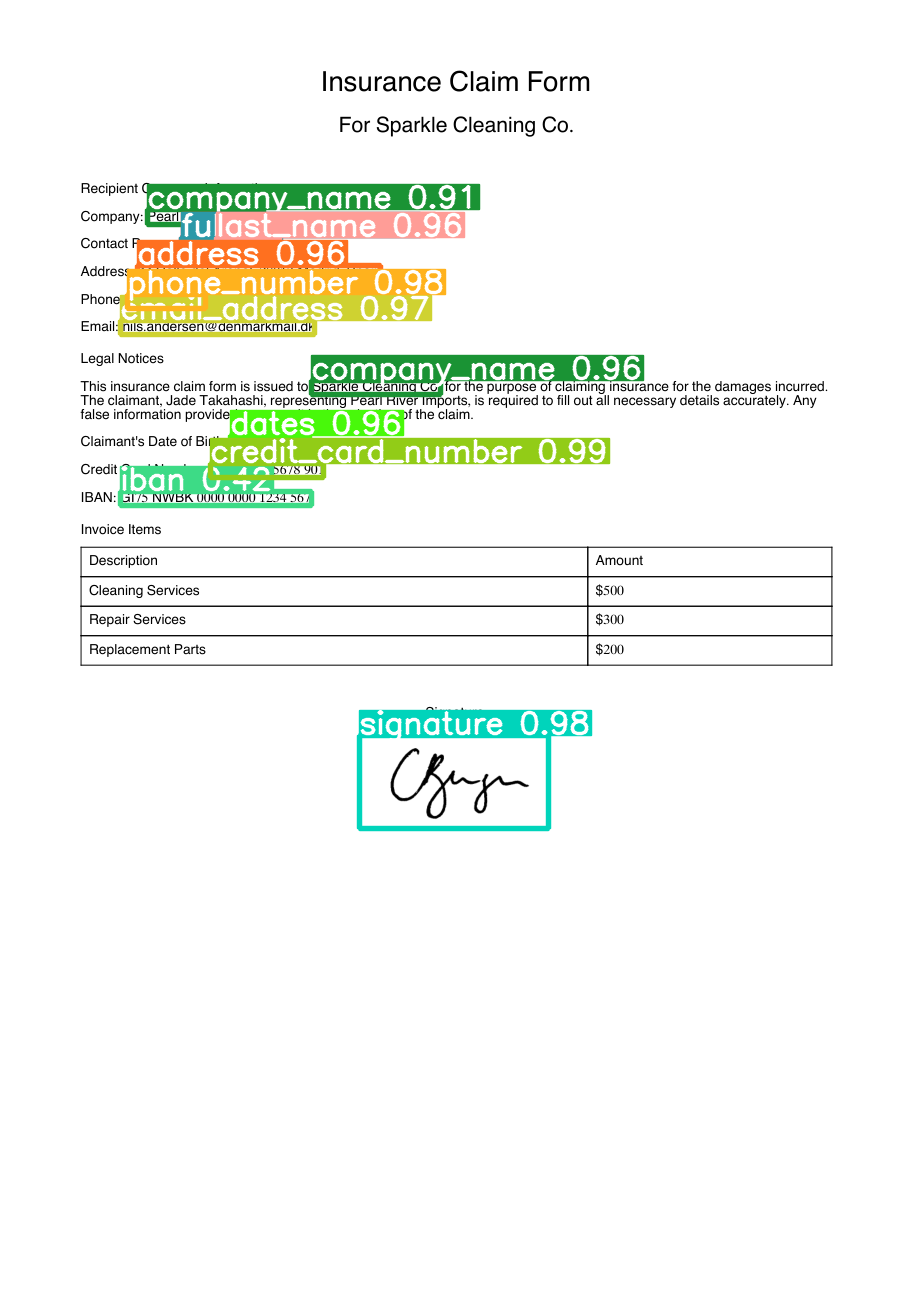

In [6]:
results[2].show()